In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_excel('student_scores.xlsx')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


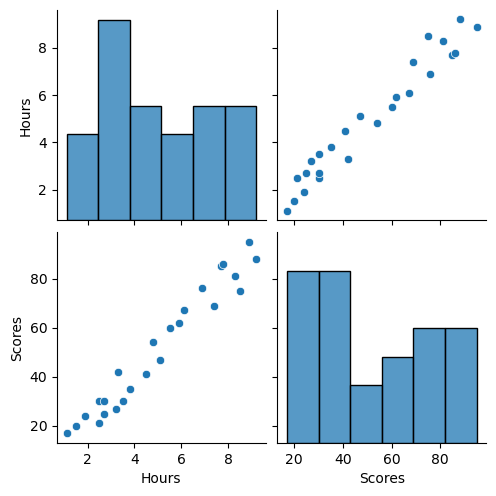

In [12]:
sns.pairplot(data = data )

OBSERVATIONS : As the number of hours increase, students score also increases.

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The variables hours and scores are highly correlated.

# Model Building - Linear Regression

In [46]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

Model's Performance Metrics

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

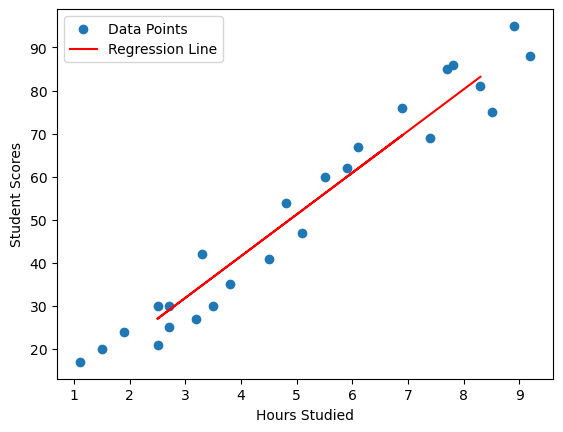

In [55]:
plt.scatter(X, y, label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Student Scores')
plt.legend()
plt.show()

In [56]:
print(f'Coefficients: {model.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [9.68207815]
Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


In [59]:
hours_studied = np.array([[9.5]]) 
predicted_score = model.predict(hours_studied)


array([94.80663482])

In [71]:
print(f'The prdicted score if a student studies for 9.5 hours per day is:  {predicted_score[0]:.2f}')

The prdicted score if a student studies for 9.5 hours per day is:  94.81


OBSERVATIONS : 
1. Low MSE indicates that the model's predictions are quite accurate with relatively low errors.
2. High R2 suggests that hours studied is an effective predictor for the student's scores.